# Group By

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [6]:
data.info()
# data.OrderDate.dt.month_name()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
OrderDate     43 non-null datetime64[ns]
Region        43 non-null object
Manager       43 non-null object
SalesMan      43 non-null object
Item          43 non-null object
Units         45 non-null float64
Unit_price    45 non-null float64
Sale_amt      45 non-null float64
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.9+ KB


In [9]:
data = pd.read_excel('SaleData.xlsx')
data.head(10)
data.set_index('OrderDate', inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2018-01-06 to NaT
Data columns (total 7 columns):
Region        43 non-null object
Manager       43 non-null object
SalesMan      43 non-null object
Item          43 non-null object
Units         45 non-null float64
Unit_price    45 non-null float64
Sale_amt      45 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


In [11]:
data.head(3)

,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
OrderDate,,,,,,,
2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0


In [12]:
data.Region.unique()

array(['East', 'Central', 'West', nan], dtype=object)

In [13]:
data.dropna(inplace=True)

In [14]:
data.Region.unique()

array(['East', 'Central', 'West'], dtype=object)

In [15]:
data.Manager.unique()

array(['Martha', 'Hermann', 'Timothy', 'Douglas'], dtype=object)

In [16]:
data.SalesMan.unique()

array(['Alexander', 'Shelli', 'Luis', 'David', 'Stephen', 'Steven',
       'Michael', 'Sigal', 'Diana', 'Karen', 'John'], dtype=object)

In [17]:
data.Item.unique()

array(['Television', 'Home Theater', 'Cell Phone', 'Desk', 'Video Games'],
      dtype=object)

In [19]:
region_gp = data.groupby('Region')

In [13]:
region_gp.groups

{'Central': Int64Index([ 1,  2,  3,  6,  7, 10, 14, 16, 19, 20, 22, 23, 26, 27, 29, 30, 31,
             33, 34, 36, 39, 40, 41, 42],
            dtype='int64'),
 'East': Int64Index([0, 5, 9, 11, 12, 13, 15, 17, 18, 21, 24, 28, 32], dtype='int64'),
 'West': Int64Index([4, 8, 25, 35, 37, 38], dtype='int64')}

In [22]:
region_central = region_gp.get_group('Central')
region_central['Sale_amt'].sum()

829769.5

In [15]:
# data[data.Region =='Central']

In [24]:
sums = data.groupby('Region')['Sale_amt'].sum()
sums

Region
Central    829769.5
East       321007.0
West       154899.0
Name: Sale_amt, dtype: float64

<BarContainer object of 3 artists>

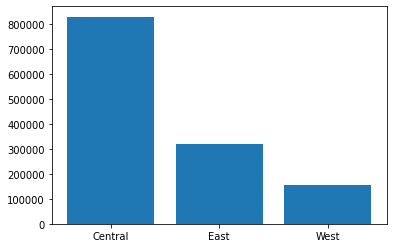

In [17]:
plt.bar(sums.index,sums.values )

In [25]:
avg_sales = data.groupby('Region')['Sale_amt'].mean()
avg_sales

Region
Central    34573.729167
East       24692.846154
West       25816.500000
Name: Sale_amt, dtype: float64

<BarContainer object of 3 artists>

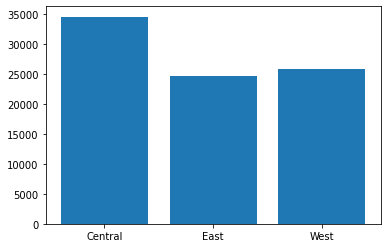

In [19]:
plt.bar(avg_sales.index,avg_sales.values )

In [26]:
sums = data.groupby('Region')['Sale_amt'].aggregate(['count','max','min','mean','sum'])
sums

,count,max,min,mean,sum
Region,,,,,
Central,24,107820.0,250.0,34573.729167,829769.5
East,13,113810.0,936.0,24692.846154,321007.0
West,6,67088.0,375.0,25816.500000,154899.0


In [27]:
# Top manager on sales amount

top_managers= data.groupby('Manager')['Sale_amt'].sum().sort_values(ascending=False)

<BarContainer object of 4 artists>

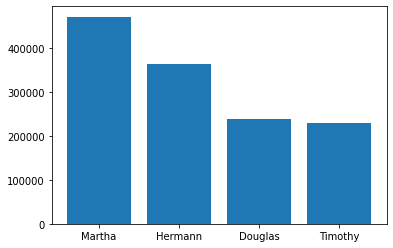

In [28]:
plt.bar(top_managers.index,top_managers.values)

In [29]:
top_items_sales_amt = data.groupby('Item')['Sale_amt'].sum().sort_values(ascending=False)

<BarContainer object of 5 artists>

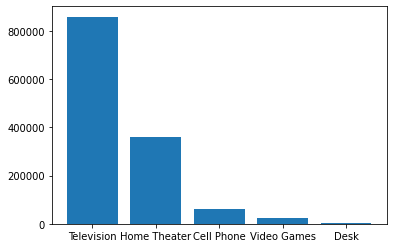

In [30]:
plt.bar(top_items_sales_amt.index,top_items_sales_amt.values)

In [31]:
data.head(1)

,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
OrderDate,,,,,,,
2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0


In [32]:
# Region wise item sale count
# data.groupby('Region')['Item'].count()
data.groupby(['Region','Item'])['Item'].count()

Region   Item        
Central  Cell Phone      1
         Desk            2
         Home Theater    8
         Television      9
         Video Games     4
East     Cell Phone      3
         Home Theater    5
         Television      2
         Video Games     3
West     Cell Phone      1
         Desk            1
         Home Theater    2
         Television      2
Name: Item, dtype: int64

# Time Series  Data

In [33]:
import datetime
from datetime import datetime

In [35]:
date = datetime(2014, 12, 15)

In [36]:
date

datetime.datetime(2014, 12, 15, 0, 0)

In [30]:
date.year

2014

In [31]:
date.month

12

In [32]:
date.day

15

In [37]:
new_date = datetime(2014, 12, 15, 17, 30)

In [38]:
new_date

datetime.datetime(2014, 12, 15, 17, 30)

In [39]:
new_date.hour

17

In [40]:
new_date.minute

30

In [42]:
today = datetime.now()

In [43]:
today

datetime.datetime(2023, 9, 1, 18, 22, 14, 600373)

In [44]:
today.date()

datetime.date(2023, 9, 1)

In [45]:
today.time()

datetime.time(18, 22, 14, 600373)

# Timestamp objects

In [46]:
pd.Timestamp('2014-11-30')

Timestamp('2014-11-30 00:00:00')

In [47]:
pd.Timestamp('2014-12-15 17:30')

Timestamp('2014-12-15 17:30:00')

In [49]:
pd.Timestamp('17:30')

Timestamp('2023-09-01 17:30:00')

In [50]:
pd.Timestamp("now")

Timestamp('2023-09-01 18:23:44.818445')

# Timedelta
- A difference between two pandas Timestamp objects is represented by a timedelta
  object, which is a representation of an exact difference in time. 
- These are common as results of determining the duration between two dates or to calculate the date at a
  specific interval of time from another date and/or time.

In [53]:
today = datetime(2023, 9, 1)
today

datetime.datetime(2023, 9, 1, 0, 0)

In [54]:
tomorrow = today + pd.Timedelta(days=1)
tomorrow

datetime.datetime(2023, 9, 2, 0, 0)

In [55]:
nextmonth_today = today + pd.Timedelta(days=10)
nextmonth_today

datetime.datetime(2023, 9, 11, 0, 0)

In [58]:
date1 = datetime(2023, 9, 1)
date2 = datetime(2023, 9, 25)

date1 - date2
date2-date1

datetime.timedelta(days=24)

# Introducing time-series data

## DatetimeIndex

In [59]:
import numpy as np

In [60]:
series = pd.Series([1,2,3,4], index=["Apple","Bat","Cat","Dog"])
series

Apple    1
Bat      2
Cat      3
Dog      4
dtype: int64

In [67]:
dates = [datetime(2023, 9, 1), datetime(2023, 9, 2)]
dates

[datetime.datetime(2023, 9, 1, 0, 0), datetime.datetime(2023, 9, 2, 0, 0)]

In [68]:
ts = pd.Series([10000, 25000], dates)
ts

2023-09-01    10000
2023-09-02    25000
dtype: int64

In [69]:
data

,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
OrderDate,,,,,,,
2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0
2018-04-01,East,Martha,Alexander,Home Theater,60.0,500.0,30000.0
2018-04-18,Central,Martha,Steven,Television,75.0,1198.0,89850.0
2018-05-05,Central,Hermann,Luis,Television,90.0,1198.0,107820.0
2018-05-22,West,Douglas,Michael,Television,32.0,1198.0,38336.0


In [70]:
ts.index

DatetimeIndex(['2023-09-01', '2023-09-02'], dtype='datetime64[ns]', freq=None)

In [71]:
ts.values

array([10000, 25000], dtype=int64)

In [72]:
series.index

Index(['Apple', 'Bat', 'Cat', 'Dog'], dtype='object')

In [73]:
series.values

array([1, 2, 3, 4], dtype=int64)

In [74]:
data.index

DatetimeIndex(['2018-01-06', '2018-01-23', '2018-02-09', '2018-02-26',
               '2018-03-15', '2018-04-01', '2018-04-18', '2018-05-05',
               '2018-05-22', '2018-06-08', '2018-06-25', '2018-07-12',
               '2018-07-29', '2018-08-15', '2018-09-01', '2018-09-18',
               '2018-10-05', '2018-10-22', '2018-11-08', '2018-11-25',
               '2018-12-12', '2018-12-29', '2019-01-15', '2019-02-01',
               '2019-02-18', '2019-03-07', '2019-03-24', '2019-04-10',
               '2019-04-27', '2019-05-14', '2019-05-31', '2019-06-17',
               '2019-07-04', '2019-07-21', '2019-08-07', '2019-08-24',
               '2019-09-10', '2019-09-27', '2019-10-14', '2019-10-31',
               '2019-11-17', '2019-12-04', '2019-12-21'],
              dtype='datetime64[ns]', name='OrderDate', freq=None)

In [76]:
data.values

array([['East', 'Martha', 'Alexander', 'Television', 95.0, 1198.0,
        113810.0],
       ['Central', 'Hermann', 'Shelli', 'Home Theater', 50.0, 500.0,
        25000.0],
       ['Central', 'Hermann', 'Luis', 'Television', 36.0, 1198.0,
        43128.0],
       ['Central', 'Timothy', 'David', 'Cell Phone', 27.0, 225.0, 6075.0],
       ['West', 'Timothy', 'Stephen', 'Television', 56.0, 1198.0,
        67088.0],
       ['East', 'Martha', 'Alexander', 'Home Theater', 60.0, 500.0,
        30000.0],
       ['Central', 'Martha', 'Steven', 'Television', 75.0, 1198.0,
        89850.0],
       ['Central', 'Hermann', 'Luis', 'Television', 90.0, 1198.0,
        107820.0],
       ['West', 'Douglas', 'Michael', 'Television', 32.0, 1198.0,
        38336.0],
       ['East', 'Martha', 'Alexander', 'Home Theater', 60.0, 500.0,
        30000.0],
       ['Central', 'Hermann', 'Sigal', 'Television', 90.0, 1198.0,
        107820.0],
       ['East', 'Martha', 'Diana', 'Home Theater', 29.0, 500.0, 14500.0]

In [80]:
data.loc['2018-01-06']

Region              East
Manager           Martha
SalesMan       Alexander
Item          Television
Units                 95
Unit_price          1198
Sale_amt          113810
Name: 2018-01-06 00:00:00, dtype: object

In [81]:
data.loc['2018']

,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
OrderDate,,,,,,,
2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0
2018-04-01,East,Martha,Alexander,Home Theater,60.0,500.0,30000.0
2018-04-18,Central,Martha,Steven,Television,75.0,1198.0,89850.0
2018-05-05,Central,Hermann,Luis,Television,90.0,1198.0,107820.0
2018-05-22,West,Douglas,Michael,Television,32.0,1198.0,38336.0


In [82]:
data.loc['2018-1']

,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
OrderDate,,,,,,,
2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0


In [83]:
data.loc['2018-1-6']

Region              East
Manager           Martha
SalesMan       Alexander
Item          Television
Units                 95
Unit_price          1198
Sale_amt          113810
Name: 2018-01-06 00:00:00, dtype: object

In [84]:
data.loc['2018-1-6':'2018-10-05']

,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
OrderDate,,,,,,,
2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0
2018-04-01,East,Martha,Alexander,Home Theater,60.0,500.0,30000.0
2018-04-18,Central,Martha,Steven,Television,75.0,1198.0,89850.0
2018-05-05,Central,Hermann,Luis,Television,90.0,1198.0,107820.0
2018-05-22,West,Douglas,Michael,Television,32.0,1198.0,38336.0


In [85]:
data.index

DatetimeIndex(['2018-01-06', '2018-01-23', '2018-02-09', '2018-02-26',
               '2018-03-15', '2018-04-01', '2018-04-18', '2018-05-05',
               '2018-05-22', '2018-06-08', '2018-06-25', '2018-07-12',
               '2018-07-29', '2018-08-15', '2018-09-01', '2018-09-18',
               '2018-10-05', '2018-10-22', '2018-11-08', '2018-11-25',
               '2018-12-12', '2018-12-29', '2019-01-15', '2019-02-01',
               '2019-02-18', '2019-03-07', '2019-03-24', '2019-04-10',
               '2019-04-27', '2019-05-14', '2019-05-31', '2019-06-17',
               '2019-07-04', '2019-07-21', '2019-08-07', '2019-08-24',
               '2019-09-10', '2019-09-27', '2019-10-14', '2019-10-31',
               '2019-11-17', '2019-12-04', '2019-12-21'],
              dtype='datetime64[ns]', name='OrderDate', freq=None)

In [88]:
data.loc['2018-12-1':'2019-12-31']

,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
OrderDate,,,,,,,
2018-12-12,Central,Douglas,John,Television,67.0,1198.0,80266.0
2018-12-29,East,Douglas,Karen,Video Games,74.0,58.5,4329.0
2019-01-15,Central,Timothy,David,Home Theater,46.0,500.0,23000.0
2019-02-01,Central,Douglas,John,Home Theater,87.0,500.0,43500.0
2019-02-18,East,Martha,Alexander,Home Theater,4.0,500.0,2000.0
2019-03-07,West,Timothy,Stephen,Home Theater,7.0,500.0,3500.0
2019-03-24,Central,Hermann,Luis,Video Games,50.0,58.5,2925.0
2019-04-10,Central,Martha,Steven,Television,66.0,1198.0,79068.0
2019-04-27,East,Martha,Diana,Cell Phone,96.0,225.0,21600.0


In [89]:
passengers  =pd.read_csv("AirPassengers.csv")

In [90]:
passengers

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


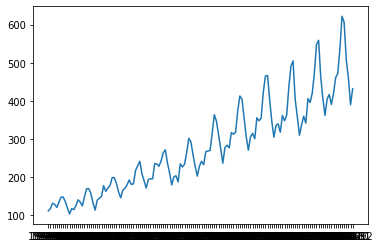

In [92]:
plt.plot(passengers.Month, passengers.Passengers)

# Namaz Break 7:10pm